In [ ]:
# Reference: https://www.kite.com/python/answers/how-to-get-the-size-of-an-image-with-pil-in-python
#         https://stackoverflow.com/questions/33831572/get-image-mode-pil-python
# https://numpy.org/doc/stable/reference/generated/numpy.where.html
# https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm
# https://note.nkmk.me/en/python-numpy-flip-flipud-fliplr/
# https://en.wikipedia.org/wiki/Kernel_(image_processing)
# https://stackoverflow.com/questions/14452824/how-can-i-save-an-image-with-pil    
    
# Note: run in cmd: jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 if you got error: IOPub data rate exceeded
# Important: the input file must be .jpg and 24 bit-depth

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def getImage(filename):
    img = Image.open(filename, "r")
    return np.array(img)

# def convert_brightness(img, ratio): #Bad version
#     A = img.copy()
#     w = A.shape[0] #number of row, or width
#     h = A.shape[1] #number of column, or height
#     for i in range(w):
#         for j in range(h):
#             R = A[i][j][0] + ratio # Red
#             G = A[i][j][1] + ratio # Green
#             B = A[i][j][2] + ratio # Blue        
#             #Limit the value of Red, Green, Blue from 0 to 255
#             if R < 0:
#                 R = 0
#             if R > 255:
#                 R = 255
#             if G < 0:
#                 G = 0
#             if G > 255:
#                 G = 255
#             if B < 0:
#                 B = 0
#             if B > 255:
#                 B = 255          
#             #set R, G, B to array
#             A[i][j][0] = R
#             A[i][j][1] = G
#             A[i][j][2] = B
#     return A

def convert_brightness(img, ratio): #Thay đổi độ sáng cho ảnh 
    A = img.copy() # create a copy of image
    
    #Add R,G,B with ratio
    A = A + np.full(A.shape, ratio) # np.full will create a 3D array of ratio, then plus it with A
    
    #Limit the value of R,G,B from 0 to 255
    A = np.where(A > 255, 255, A) #if R,G,B > 255 then set it = 255
    A = np.where(A < 0, 0, A) #if R,G,B < 0 then set it = 0
    
    return A

def convert_constrast(img, ratio): # Thay đổi độ tương phản 
    A = img.copy()
    
    #Add R,G,B with ratio
    A = A * np.full(A.shape, ratio)# np.full will create a 3D array of ratio, then multiply it to A, and we have to use astype to make it int
    
    A = A.astype(int) #change the RGB value from float back to int
    #Limit the value of R,G,B from 0 to 255
    A = np.where(A > 255, 255, A) #if R,G,B > 255 then set it = 255
    A = np.where(A < 0, 0, A) #if R,G,B < 0 then set it = 0
    
    return A

def convert_gray(img): # Chuyển đổi ảnh RGB thành ảnh xám 
    A = img.copy()
    w = A.shape[0] #number of row, or width
    h = A.shape[1] #number of column, or height
    for i in range(w):
        for j in range(h):
            R = A[i][j][0] # Red
            G = A[i][j][1] # Green
            B = A[i][j][2] # Blue
            
            Gray = (0.3 * R) + (0.59 * G) + (0.11 * B) # Weighted method or luminosity method
            #set R, G, B equal Gray
            A[i][j][0] = Gray
            A[i][j][1] = Gray
            A[i][j][2] = Gray
    return A

def flip_horizontal(img): #Lật ảnh ngang
    A = img.copy()
    #return np.fliplr(A) #a faster functinon
    w = A.shape[0]
    h = A.shape[1]
    for i in range(w):
        for j in range(h):
            A = img[:, ::-1]
    return A

def flip_vertical(img): #Lật ảnh dọc
    A = img.copy()
    #return np.flipud(A) #a faster function
    w = A.shape[0]
    h = A.shape[1]
    for i in range(w):
        for j in range(h):
            A = img[::-1]
    return A

def double_exposure(img1, img2): # Chồng 2 ảnh cùng kích thước: chỉ làm trên ảnh xám
    A = np.full(img1.shape, 0) #create a 3D matrix full of 0
    A = np.add(img1, img2) #plus 2 3D arrays
    
#     #Limit the value of R,G,B from 0 to 255
    A = np.where(A > 255, 255, A) #if R,G,B > 255 then set it = 255
    A = np.where(A < 0, 0, A) #if R,G,B < 0 then set it = 0
    
    return A

def calcBoxMatrix(A, pos1, pos2): # calculate the matrix 3x3
    avgR = 0 #  average red
    avgG = 0 # average green
    avgB = 0 # average blue
    size = A.shape[0]
    for i in range(pos1 - 1, pos1 + 2):
        for j in range(pos2 - 1, pos2 + 2):
            avgR += A[i][j][0]
            avgG += A[i][j][1]
            avgB += A[i][j][2]
    return int(avgR / 9), int(avgG / 9), int(avgB / 9)

def box_blur(img): # Làm mờ ảnh
    A = img.copy()
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            A[i][j] = calcBoxMatrix(img, i, j)
    return A

def saveImage(img, filename):
    img_save = Image.fromarray(img.astype('uint8'), 'RGB') # important: if you don't astype image 'uint8' then it will be error when saving bright, constrast image.
    img_save.save(filename)

In [20]:
img = getImage("lena.jpg")
img1 = getImage("gray.jpg")
img2 = getImage("star.jpg")

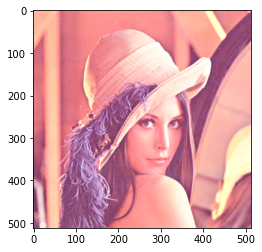

In [21]:
img_bright = convert_brightness(img, 50)
plt.imshow(img_bright)
np.set_printoptions(threshold=np.inf) #to turn off the warning
saveImage(img_bright, "lena_bright.jpg")

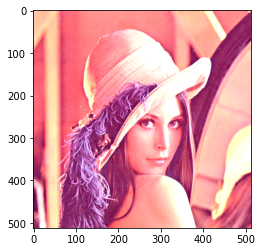

In [22]:
img_constrast = convert_constrast(img, 1.5)
plt.imshow(img_constrast)
np.set_printoptions(threshold=np.inf) #to turn off the warning
saveImage(img_constrast, "lena_contrast.jpg")

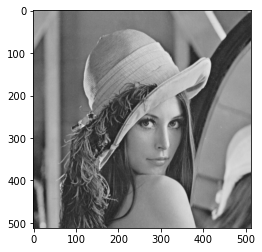

In [23]:
img_gray = convert_gray(img)
plt.imshow(img_gray)
np.set_printoptions(threshold=np.inf) #to turn off the warning
saveImage(img_gray, "lena_gray.jpg")

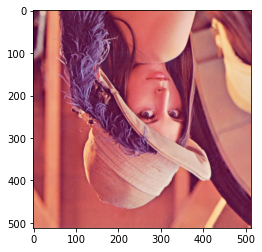

In [24]:
flip_vertical = flip_vertical(img)
plt.imshow(flip_vertical)
np.set_printoptions(threshold=np.inf) #to turn off the warning
saveImage(flip_vertical, "lena_vertical.jpg")

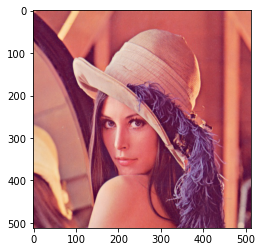

In [25]:
flip_horizon = flip_horizontal(img)
plt.imshow(flip_horizon)
np.set_printoptions(threshold=np.inf) #to turn off the warning
saveImage(flip_horizon, "lena_horizontal.jpg")

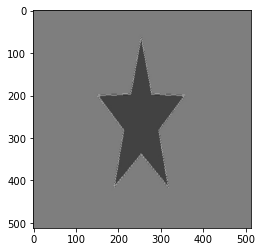

In [26]:
img_double = double_exposure(convert_gray(img1), convert_gray(img2))
plt.imshow(img_double)
np.set_printoptions(threshold=np.inf) #to turn off the warning
saveImage(img_double, "double_exposure.jpg")

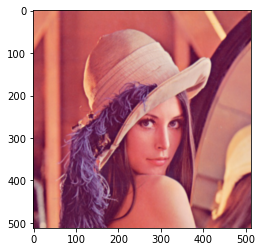

In [27]:
img_blur = box_blur(img)
plt.imshow(img_blur)
np.set_printoptions(threshold=np.inf) #to turn off the warning
saveImage(img_blur, "lena_blur.jpg")